## 1. Google Drive와 연동하기

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
path = "gdrive/'My Drive'/'Colab Notebooks'/CNN"

!ls gdrive/'My Drive'/'Colab Notebooks'/CNN/datasets

cats_and_dogs_small


In [ ]:
!nvidia-smi

Wed Aug  5 05:22:41 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.57       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   44C    P8    10W /  70W |      0MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
cd gdrive/My Drive/Colab Notebooks/CNN/datasets

/content/gdrive/My Drive/Colab Notebooks/CNN/datasets


In [ ]:
pwd

'/content/gdrive/My Drive/Colab Notebooks/CNN/datasets'

In [ ]:
ls

cats_and_dogs_small/


## 2. 훈련, 검증, 테스트 폴더 지정하기
* 훈련 데이터 : 2000건
* 검증 데이터 : 1000건
* 테스트 데이터 : 1000건

In [ ]:
import os
base_dir = '/content/gdrive/My Drive/Colab Notebooks/CNN/datasets/cats_and_dogs_small'

train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir,'validation')
test_dir=os.path.join(base_dir,'test')

In [ ]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

train_cats_dir = os.path.join(base_dir, 'train', 'cats')
print(train_cats_dir)

/content/gdrive/My Drive/Colab Notebooks/CNN/datasets/cats_and_dogs_small/train/cats


In [ ]:
for fname in sorted(os.listdir(train_cats_dir)):
    print(fname)
    fnames = os.path.join(train_cats_dir, fname)
    print(fnames)
    img = image.load_img(fnames)
    img_data = image.img_to_array(img)
    print(img_data.shape)
    print(img_data)
    break

print(img_data.dtype)

cat.0.jpg
/content/gdrive/My Drive/Colab Notebooks/CNN/datasets/cats_and_dogs_small/train/cats/cat.0.jpg
(374, 500, 3)
[[[203. 164.  87.]
  [203. 164.  87.]
  [204. 165.  88.]
  ...
  [240. 201. 122.]
  [239. 200. 121.]
  [238. 199. 120.]]

 [[203. 164.  87.]
  [203. 164.  87.]
  [204. 165.  88.]
  ...
  [241. 202. 123.]
  [240. 201. 122.]
  [238. 199. 120.]]

 [[203. 164.  87.]
  [203. 164.  87.]
  [204. 165.  88.]
  ...
  [241. 202. 123.]
  [240. 201. 122.]
  [239. 200. 121.]]

 ...

 [[153. 122.  55.]
  [153. 122.  55.]
  [153. 122.  55.]
  ...
  [  2.   2.   0.]
  [  2.   2.   0.]
  [  2.   2.   0.]]

 [[152. 121.  54.]
  [152. 121.  54.]
  [152. 121.  54.]
  ...
  [  2.   2.   0.]
  [  2.   2.   0.]
  [  2.   2.   0.]]

 [[151. 120.  53.]
  [151. 120.  53.]
  [151. 120.  53.]
  ...
  [  1.   1.   0.]
  [  1.   1.   0.]
  [  1.   1.   0.]]]
float32


In [ ]:
i=0
for fname in os.listdir(train_cats_dir):
    fnames = os.path.join(train_cats_dir, fname)
    img = image.load_img(fnames)
    img_data = image.img_to_array(img)
    print(img_data.shape)
    i += 1
    if i > 4 :
        break

(374, 400, 3)
(499, 403, 3)
(280, 300, 3)
(374, 500, 3)
(386, 500, 3)


cat.106.jpg


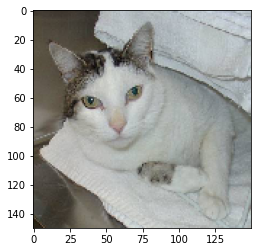

In [ ]:
# 크기 맞추어서 로딩
for fname in os.listdir(train_cats_dir):
    fnames = os.path.join(train_cats_dir, fname)
    img = image.load_img(fnames, target_size=(150,150))
    img_data = image.img_to_array(img)
    
    print(fname)

    img_data = img_data.astype('uint8')
    plt.imshow(img_data)
    plt.show()
    break

cat.106.jpg


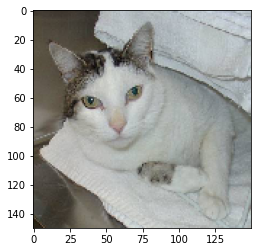

cat.100.jpg


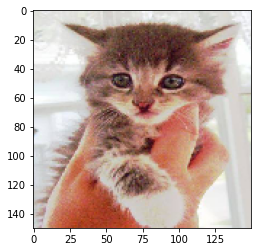

cat.1.jpg


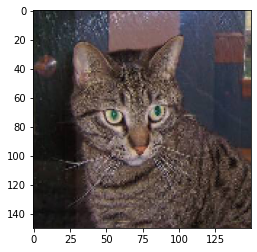

cat.0.jpg


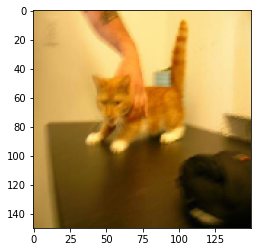

cat.103.jpg


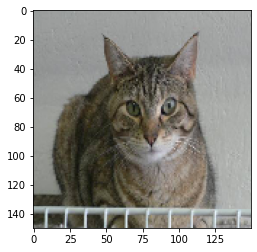

In [ ]:
# 크기 맞추어서 로딩
i=0
for fname in os.listdir(train_cats_dir):
    fnames = os.path.join(train_cats_dir, fname)
    img = image.load_img(fnames, target_size=(150,150))
    img_data = image.img_to_array(img)
    
    print(fname)

    img_data = img_data.astype('uint8')
    plt.imshow(img_data)
    plt.show()
    i+=1
    if i>4 :
        break

## 데이터 전처리
* ImageDataGenerator를 사용하여 디렉토리에서 이미지 읽기
* kera에서 제공하는 이미지데이터 학습을 위한 라이브러리
* 디스크에 있는 이미지파일을 전처리된 배치 텐서로 자동으로 바꿔주는 파이썬 제너레이터
* 데이터 전처리, 폴더형태로 가져오는 밥법(flow_from_directory) 메소드, 여러가지 기능 제공


### 파이썬 제너레이터
* yield 연산자는 제어를 넘겨줌

In [ ]:
def generator():
    i = 0
    while True:
        i+=1
        yield i

In [ ]:
for item in generator():
    print(item)
    if item>4:
        break

1
2
3
4
5


* 

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
# class_mode : 디렉터리 정보를 사용하여 labeling을 자동으로 해줌
# binary : 이진 분류
# categoricl : n진 분류
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150,150), batch_size=20, class_mode='binary')
validation_generator = validation_datagen.flow_from_directory(validation_dir, target_size=(150,150), batch_size=20, class_mode='binary') 
test_generator = test_datagen.flow_from_directory(test_dir, target_size=(150,150), batch_size=20, class_mode='binary') 

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
data_batch, labels_batch = next(train_generator)

print(data_batch.shape)
print(labels_batch.shape)

(20, 150, 150, 3)
(20,)


In [ ]:
print(labels_batch) # 0: 고양이, 1: 개

[1. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1.]


## 3. 모델 생성

In [ ]:
from tensorflow.keras import layers, models, optimizers

0. Sequential 객체 생성
1. conv layer(filter32, kernel size(3,3), activation 'relu', input_shape()
2. pooling layer(pool_size(2,2))
3. conv layer(filter 64, kernel size(3,3), activation 'relu'
4. pooling layer(pool_size(2,2))
5. conv layer(filter 128, kernel size(3,3), activation 'relu'
6. pooling layer(pool_size(2,2))
7. conv layer(filter 128, kernel size(3,3), activation 'relu'
8. pooling layer(pool_size(2,2))
-------
9. flatten layer
10. Dense layer 512, relu
11. Dense layer 1, sigmoid

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(150,150,3)))
model.add(layers.MaxPool2D(pool_size=(2,2)))

model.add(layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))

model.add(layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))

model.add(layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))

model.add(layers.Flatten())
model.add(layers.Dense(units=512, activation='relu'))
model.add(layers.Dense(units=1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)      

## 5. 컴파일

In [ ]:
from tensorflow.keras import layers, models, optimizers

In [ ]:
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['accuracy'])

## 6. 배치 제너레이터를 사용하여 모델 훈련

In [ ]:
history = model.fit_generator(train_generator, steps_per_epoch=100, epochs=20, validation_data=validation_generator, validation_steps=50)

Epoch 1/20
100/100 [==============================] - 1967s 20s/step - loss: 0.6870 - accuracy: 0.5335 - val_loss: 0.6689 - val_accuracy: 0.5940
Epoch 2/20
100/100 [==============================] - 13s 126ms/step - loss: 0.6570 - accuracy: 0.6105 - val_loss: 0.6768 - val_accuracy: 0.5620
Epoch 3/20
100/100 [==============================] - 12s 124ms/step - loss: 0.6318 - accuracy: 0.6420 - val_loss: 0.6194 - val_accuracy: 0.6670
Epoch 4/20
100/100 [==============================] - 12s 118ms/step - loss: 0.5898 - accuracy: 0.7000 - val_loss: 0.6124 - val_accuracy: 0.6570
Epoch 5/20
100/100 [==============================] - 12s 119ms/step - loss: 0.5510 - accuracy: 0.7200 - val_loss: 0.6671 - val_accuracy: 0.6200
Epoch 6/20
100/100 [==============================] - 12s 118ms/step - loss: 0.5261 - accuracy: 0.7410 - val_loss: 0.5534 - val_accuracy: 0.7150
Epoch 7/20
100/100 [==============================] - 12s 117ms/step - loss: 0.4917 - accuracy: 0.7720 - val_loss: 0.5834 - val_ac

## 7. 훈련의 정확도와 손실 그래프 그리기

In [ ]:
import matplotlib.pyplot as plt

acc    = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) +1)

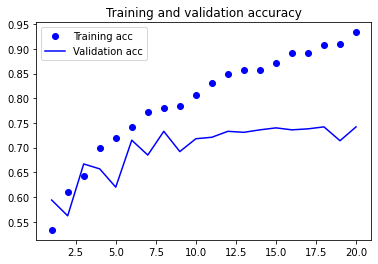

In [ ]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.show()

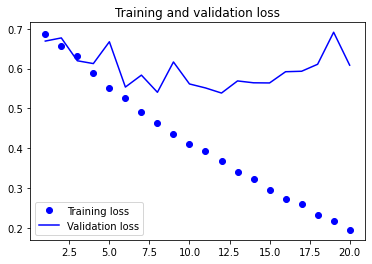

In [ ]:
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## 8. 모델 평가하기



In [ ]:
test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print(test_acc)

0.7509999871253967


In [ ]:
prediction = model.predict_generator(test_generator, steps=1)
prediction[0][0]

Instructions for updating:
Please use Model.predict, which supports generators.


0.982897

In [ ]:
test_generator.class_indices

{'cats': 0, 'dogs': 1}

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array

base_dir = '/content/gdrive/My Drive/Colab Notebooks/CNN/datasets/cats_and_dogs_small'
train_cats_dir = os.path.join(base_dir, 'train', 'dogs')
fname = os.path.join(train_cats_dir, 'dog.100.jpg')
img = load_img(fname, target_size=(150,150))
img_data =img_to_array(img)

predict = model.predict(img_data.reshape([1, 150, 150, 3]))
print(predict)

[[1.]]


## 9. 모델 저장하기

In [ ]:
model.save('/content/gdrive/My Drive/Colab Notebooks/CNN/datasets/cats_and_dogs_small_1.h5')

In [ ]:
from tensorflow.keras.models import load_model
loadmodel = load_model('/content/gdrive/My Drive/Colab Notebooks/CNN/datasets/cats_and_dogs_small_1.h5')


In [ ]:
loadmodel.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)      

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
import numpy as np

base_dir = '/content/gdrive/My Drive/Colab Notebooks/CNN/datasets/cats_and_dogs_small'
train_cats_dir = os.path.join(base_dir, 'train', 'dogs')
fname = os.path.join(train_cats_dir, 'dog.100.jpg')
fname2 = os.path.join(train_cats_dir, 'dog.101.jpg')
img = load_img(fname, target_size=(150,150))
img2 = load_img(fname2, target_size=(150,150))

img_data =np.ndarray((2,150,150,3))

img_data[0] = img_to_array(img)
img_data[1] = img_to_array(img2)

predict = model.predict(img_data)
predict

array([[1.],
       [1.]], dtype=float32)